# PCA Wine Dataset 

## Problem Statement -   

### Perform Principal component analysis and perform clustering using first  3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df
 

## ======================================================================== 

# 1. Import Necessery Libraries -  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

# 2. Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 3. Import Data Set -  

In [3]:
wine_data = pd.read_csv("wine.csv")
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 4. EDA -  

In [4]:
wine_data.shape

(178, 14)

In [5]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
wine_data.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [9]:
wine_data.duplicated().sum()

0

In [10]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# 5. Data Visualization -  

In [11]:
corr_matrix = wine_data.corr()

<AxesSubplot:>

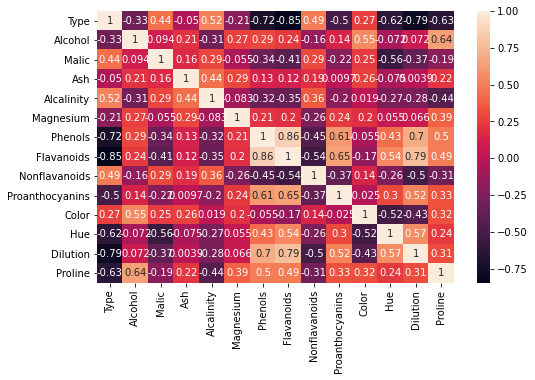

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(wine_data.corr(),annot=True)

In [13]:
corr_matrix['Type'].sort_values(ascending=False)

Type               1.000000
Alcalinity         0.517859
Nonflavanoids      0.489109
Malic              0.437776
Color              0.265668
Ash               -0.049643
Magnesium         -0.209179
Alcohol           -0.328222
Proanthocyanins   -0.499130
Hue               -0.617369
Proline           -0.633717
Phenols           -0.719163
Dilution          -0.788230
Flavanoids        -0.847498
Name: Type, dtype: float64

### By seeing the corelation matrix , we observe that Alcalinity  ,Nonflavanoids and Malic have high correlation with label data (type of wine ) and Phenols -0.719163,Dilution          -0.788230,Flavanoids        -0.847498 has high non -relation

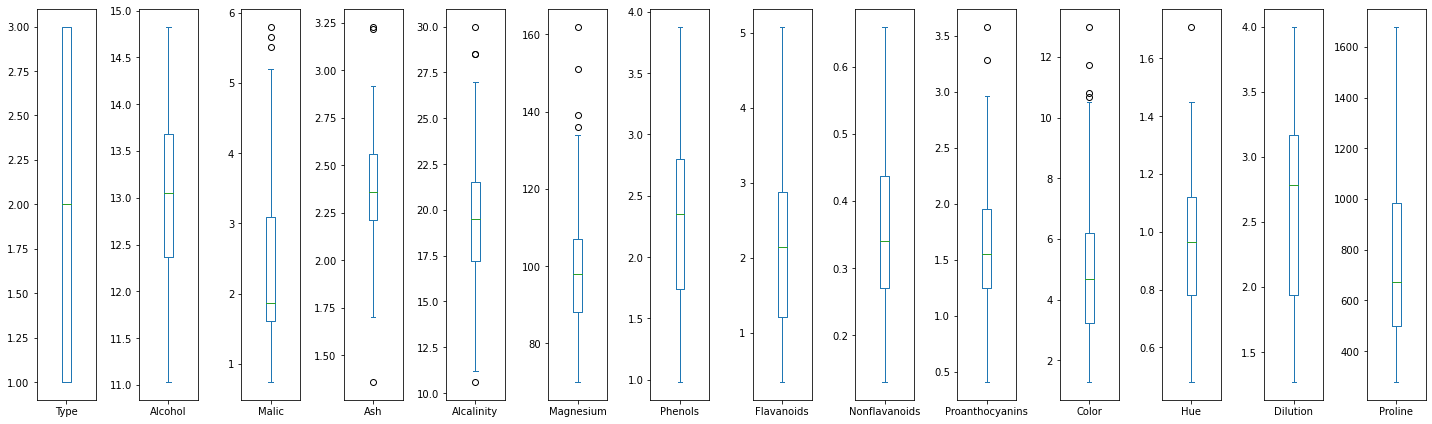

In [14]:
#Most of  observed outliers is present. Eliminate the outliers for better accuracy or prediction of model
wine_data.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

In [15]:
#Remove outlier
wine_data.drop(wine_data.index[wine_data['Malic']>5.2], inplace=True)
wine_data.drop(wine_data.index[wine_data['Ash']>3], inplace=True)
wine_data.drop(wine_data.index[wine_data['Ash']<1.8], inplace=True)
wine_data.drop(wine_data.index[wine_data['Alcalinity']>25], inplace=True)
wine_data.drop(wine_data.index[wine_data['Alcalinity']<11], inplace=True)
wine_data.drop(wine_data.index[wine_data['Magnesium']>132], inplace=True)
wine_data.drop(wine_data.index[wine_data['Proanthocyanins']>2.5], inplace=True)
wine_data.drop(wine_data.index[wine_data['Color']>10.5], inplace=True)
wine_data.drop(wine_data.index[wine_data['Hue']>1.6], inplace=True)

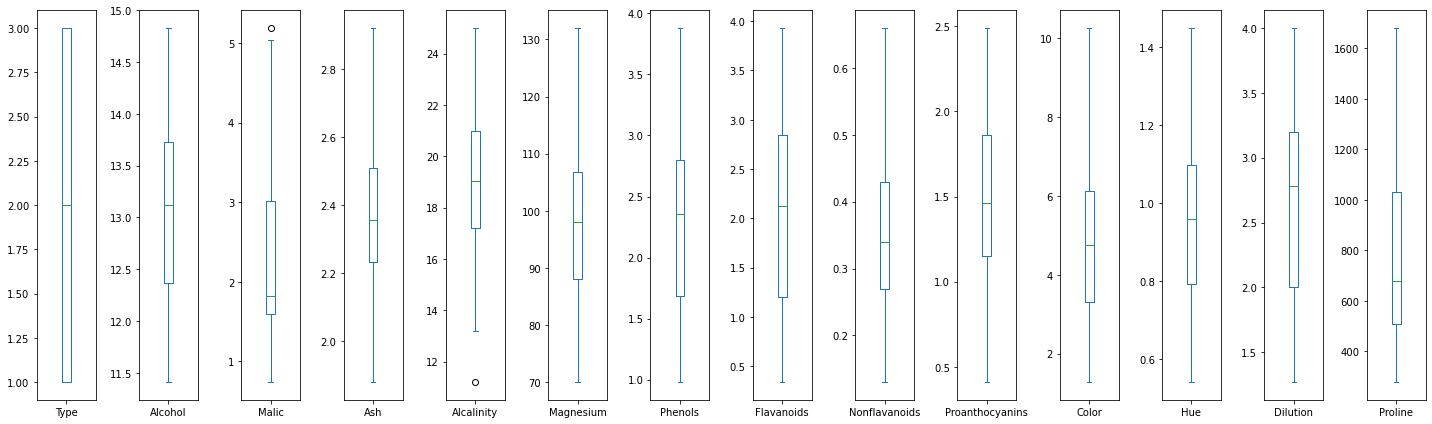

In [16]:
wine_data.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()# no outlier in data 

# 6. Data Preparation -  

In [17]:
#remove type column in dataset
wine_data.drop(wine_data.columns[0],axis=1, inplace=True)
wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [18]:
scale = MinMaxScaler()
data_std = scale.fit_transform(wine_data)
data_std = pd.DataFrame(data_std, columns=wine_data.columns)
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.217978,0.528846,0.318841,0.919355,0.627586,0.757660,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.233708,0.250000,0.000000,0.483871,0.575862,0.674095,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642
2,0.865497,0.271910,0.596154,0.405797,0.693548,0.989655,0.877437,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347
3,0.535088,0.415730,0.951923,0.710145,0.774194,0.627586,0.654596,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963
4,0.815789,0.229213,0.548077,0.289855,0.677419,0.789655,0.849582,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949


In [19]:
data_std.shape

(146, 13)

# 7. Applying PCA -  

### Applying PCA to reduce dimensions 

In [20]:
pca = PCA(random_state=40)
pca_values = pca.fit_transform(data_std)

In [21]:
pca_values

array([[-0.84233864, -0.31316056, -0.04666457, ..., -0.07365881,
         0.0663631 ,  0.01859631],
       [-0.51568336,  0.07485666, -0.41032243, ..., -0.09612312,
         0.01427544, -0.02958953],
       [-0.92351107, -0.61805995, -0.09323596, ...,  0.13471713,
        -0.01319928,  0.09778289],
       ...,
       [ 0.68303984, -0.73407235, -0.23168785, ...,  0.04368739,
         0.22243833,  0.01626446],
       [ 0.60193096, -0.57834227, -0.0553614 , ...,  0.04154931,
         0.1126929 ,  0.04618786],
       [ 0.76105731, -0.68786338,  0.30810935, ..., -0.06045041,
        -0.04173781,  0.07586643]])

### The amount of variance that each PCA has 

In [22]:
var = pca.explained_variance_ratio_
var

array([0.43033148, 0.20328549, 0.07480698, 0.06607368, 0.04427714,
       0.04252309, 0.03302375, 0.02509484, 0.0220638 , 0.02164558,
       0.01533855, 0.01412006, 0.00741557])

### Cummulative variance of each PCA 

In [23]:
var1 = np.cumsum(np.round(var,4)*100)
var1

array([43.03, 63.36, 70.84, 77.45, 81.88, 86.13, 89.43, 91.94, 94.15,
       96.31, 97.84, 99.25, 99.99])

### Variance plot for PCA components obtained  

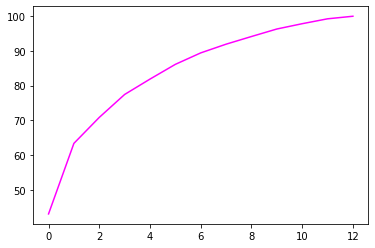

In [24]:
plt.plot(var1,color='magenta')

In [25]:
#First 3 principal components have more contribution i.e about 72%.
#So we are considering first 3 components for the building model.
pca_values[:,:3]

array([[-0.84233864, -0.31316056, -0.04666457],
       [-0.51568336,  0.07485666, -0.41032243],
       [-0.92351107, -0.61805995, -0.09323596],
       [-0.29106975, -0.17829015,  0.52426402],
       [-0.7460016 , -0.47618401, -0.0455123 ],
       [-0.61583118, -0.25149853, -0.11909687],
       [-0.50789067, -0.35436914,  0.16155657],
       [-0.61349455, -0.20472248, -0.33036077],
       [-0.69149042, -0.16897667, -0.26189547],
       [-0.86231335, -0.27964774, -0.07665853],
       [-0.42563529, -0.12571205, -0.11921987],
       [-0.52258444, -0.13871166, -0.0705566 ],
       [-0.57032079, -0.37907031,  0.24626879],
       [-0.56161455, -0.51692648,  0.30967037],
       [-0.49709256, -0.35040422,  0.30038554],
       [-0.87980517, -0.56807784,  0.02903436],
       [-0.52799105, -0.26986591, -0.06537644],
       [-0.7845861 , -0.17037568, -0.14616348],
       [-0.30683003, -0.06746971,  0.16442142],
       [-0.64593316,  0.05529587, -0.05708592],
       [-0.41712928,  0.1543406 ,  0.087

In [26]:
#Creating dataset using PCA (first 3 components)
wine_data_pca =pd.DataFrame(pca_values[:,:3], columns=['PC1', 'PC2', 'PC3'])
wine_data_pca.head(10)

,PC1,PC2,PC3
0,-0.842339,-0.313161,-0.046665
1,-0.515683,0.074857,-0.410322
2,-0.923511,-0.618060,-0.093236
3,-0.291070,-0.178290,0.524264
4,-0.746002,-0.476184,-0.045512
5,-0.615831,-0.251499,-0.119097
6,-0.507891,-0.354369,0.161557
7,-0.613495,-0.204722,-0.330361
8,-0.691490,-0.168977,-0.261895
9,-0.862313,-0.279648,-0.076659


<AxesSubplot:>

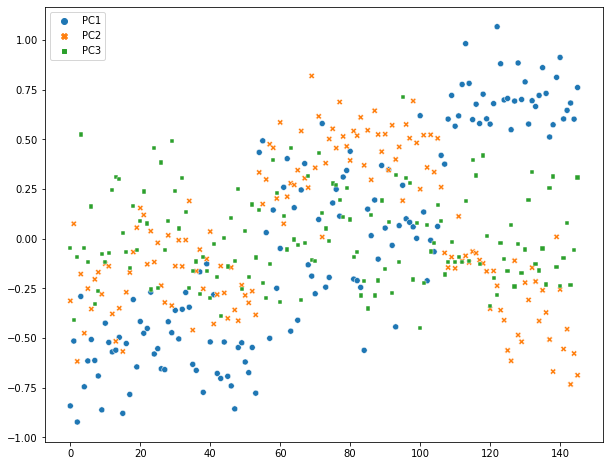

In [27]:
# Visualization of PCAs
fig=plt.figure(figsize=(10,8))
sns.scatterplot(data=wine_data_pca)

# Checking with other Clustering Algorithms 

## Hierarchical Clustering with PCA

## Building Model 

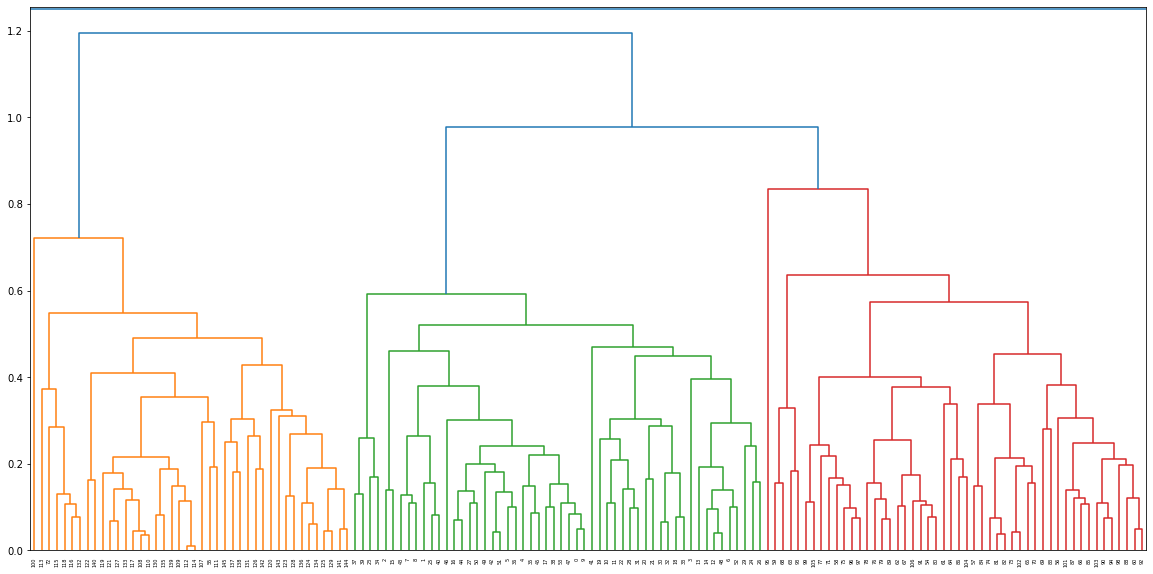

In [28]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_data_pca, method='average'))
plt.axhline(y=1.25)

In [29]:
#From above dendrogram, we can see that '3' number of clusters are formed.
hc = AgglomerativeClustering(n_clusters=3)

In [30]:
wine_data_hc=hc.fit(wine_data_pca)
wine_data_hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [31]:
#Calculating 'Silhouette' Score
import sklearn
round(sklearn.metrics.silhouette_score(wine_data_pca, wine_data_hc.labels_),4)

0.4473

In [32]:
#Adding Cluster column in the data
wine_data_pca['ClusterID_HC']=wine_data_hc.labels_
wine_data_pca.head()

,PC1,PC2,PC3,ClusterID_HC
0,-0.842339,-0.313161,-0.046665,0
1,-0.515683,0.074857,-0.410322,0
2,-0.923511,-0.618060,-0.093236,0
3,-0.291070,-0.178290,0.524264,0
4,-0.746002,-0.476184,-0.045512,0


In [33]:
#Grouping clusters
wine_data_pca.groupby('ClusterID_HC').mean()

,PC1,PC2,PC3
ClusterID_HC,,,
0,-0.511866,-0.092282,0.007093
1,0.157574,0.451320,0.029862
2,0.690419,-0.267495,-0.039268


In [34]:
wine_data_pca['ClusterID_HC'].value_counts()

0    67
2    41
1    38
Name: ClusterID_HC, dtype: int64

# Hierarchical Clustering without PCA 

In [35]:
#Hierarchical Clustering without PCA
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.217978,0.528846,0.318841,0.919355,0.627586,0.757660,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.233708,0.250000,0.000000,0.483871,0.575862,0.674095,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642
2,0.865497,0.271910,0.596154,0.405797,0.693548,0.989655,0.877437,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347
3,0.535088,0.415730,0.951923,0.710145,0.774194,0.627586,0.654596,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963
4,0.815789,0.229213,0.548077,0.289855,0.677419,0.789655,0.849582,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949


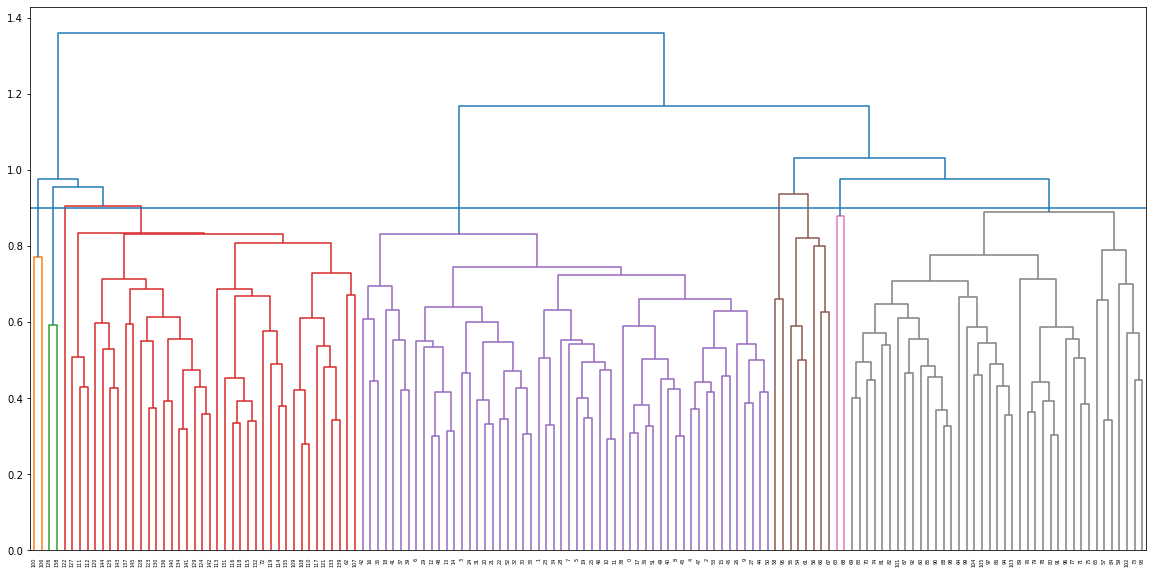

In [36]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(data_std, method='average'))
plt.axhline(y=0.9)

In [37]:
#From above dendrogram, we are selecting number of clusters as '7'.
hc=AgglomerativeClustering(n_clusters=7)

In [38]:
wine_data_hc1=hc.fit(data_std)
wine_data_hc1.labels_

array([5, 0, 5, 0, 5, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 5, 5,
       5, 5, 0, 5, 0, 5, 5, 5, 0, 5, 6, 6, 0, 2, 4, 0, 2, 6, 1, 0, 2, 2,
       6, 6, 0, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 1, 1, 1,
       1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 6, 3, 3, 3, 1,
       1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3], dtype=int64)

In [39]:
#Calculating 'Silhoutte' Score
round(sklearn.metrics.silhouette_score(data_std, wine_data_hc1.labels_),4)

0.1436

In [40]:
#Adding cluster column
data_std['ClusterID']=wine_data_hc1.labels_
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterID
0,0.824561,0.217978,0.528846,0.318841,0.919355,0.627586,0.757660,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341,5
1,0.523392,0.233708,0.250000,0.000000,0.483871,0.575862,0.674095,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642,0
2,0.865497,0.271910,0.596154,0.405797,0.693548,0.989655,0.877437,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347,5
3,0.535088,0.415730,0.951923,0.710145,0.774194,0.627586,0.654596,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963,0
4,0.815789,0.229213,0.548077,0.289855,0.677419,0.789655,0.849582,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949,5


In [41]:
#Grouping Clusters
data_std.groupby('ClusterID').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClusterID,,,,,,,,,,,,,
0,0.624896,0.295409,0.590934,0.485507,0.528571,0.574778,0.660485,0.338544,0.591758,0.385778,0.613815,0.670644,0.535582
1,0.476462,0.575056,0.478846,0.680797,0.443548,0.180690,0.108774,0.551887,0.229327,0.402171,0.252527,0.188645,0.233310
2,0.240393,0.207785,0.294986,0.633023,0.315668,0.504926,0.539296,0.323450,0.584821,0.184418,0.509419,0.656463,0.142373
3,0.544022,0.644944,0.536325,0.748390,0.489247,0.240230,0.133705,0.561845,0.387553,0.843851,0.087302,0.137973,0.265335
4,0.220551,0.288443,0.512363,0.752588,0.256912,0.284975,0.372662,0.694070,0.493819,0.187321,0.580063,0.457352,0.165936
5,0.744597,0.271617,0.467391,0.396345,0.656381,0.721739,0.806346,0.242822,0.803094,0.560037,0.526995,0.710463,0.612200
6,0.300439,0.203371,0.278846,0.454710,0.487903,0.309914,0.201602,0.754717,0.231971,0.397411,0.436813,0.198260,0.229048


# Observation:

Silhouette score (Hierarchical Clustering) :

With PCA : 0.4468

Without PCA : 0.1313

From this, we can say that Hierarchical clustering model done with the help of PCA is better than without PCA.  

# Kmeans with PCA 

In [42]:
#Kmeans with PCA
wine_data_pca.drop(wine_data_pca.columns[-1], axis=1, inplace=True)
wine_data_pca.head()

,PC1,PC2,PC3
0,-0.842339,-0.313161,-0.046665
1,-0.515683,0.074857,-0.410322
2,-0.923511,-0.618060,-0.093236
3,-0.291070,-0.178290,0.524264
4,-0.746002,-0.476184,-0.045512


In [43]:
#'Elbow' curve
plt.figure(figsize=[8,5])

wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(wine_data_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,6), wcss,'bo-', color = 'g')
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

<Figure size 576x360 with 0 Axes>

In [ ]:
#From above elbow method curve, we will select K value as '3'.
wine_kmeans=KMeans(n_clusters=3).fit(wine_data_pca)
wine_kmeans

In [ ]:
wine_kmeans.labels_

In [ ]:
#Calculating 'Silhouette' score
round(sklearn.metrics.silhouette_score(wine_data_pca, wine_kmeans.labels_),4)

In [ ]:
#Adding cluster column
wine_data_pca['ClusterID_kmeans']=wine_kmeans.labels_

In [ ]:
wine_data_pca.head()

In [ ]:
#Grouping cluster
wine_data_pca.groupby('ClusterID_kmeans').mean()

# Kmeans without PCA 

In [ ]:
#Kmeans without PCA
data_std.drop(data_std.columns[-1], axis=1, inplace=True)
data_std.head()

In [ ]:
#'Elbow' Curve
plt.figure(figsize=[8,5])

wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,6), wcss,'bo-', color = 'g')
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#above elbow method curve, we will select K value '3'
wine_kmeans1=KMeans(n_clusters=3).fit(data_std)
wine_kmeans1.labels_

In [ ]:
#Calculating 'Silhouette' score
round(sklearn.metrics.silhouette_score(data_std, wine_kmeans1.labels_),4)

In [ ]:
#Adding cluster column in the data
data_std['ClusterID']=wine_kmeans1.labels_
data_std.head()

In [ ]:
#Grouping Clusters
data_std.groupby('ClusterID').mean()

In [ ]:
data_std['ClusterID'].value_counts()

# Observation :

Silhouette score (KMeans Clustering) :

With PCA : 0.4707

Without PCA : 0.2992

From this, we can say that KMeans clustering model done with the help of PCA is better than without PCA. 